# **Sales Prediction for Walmart in Mexico**
____

Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**26 April 2024**

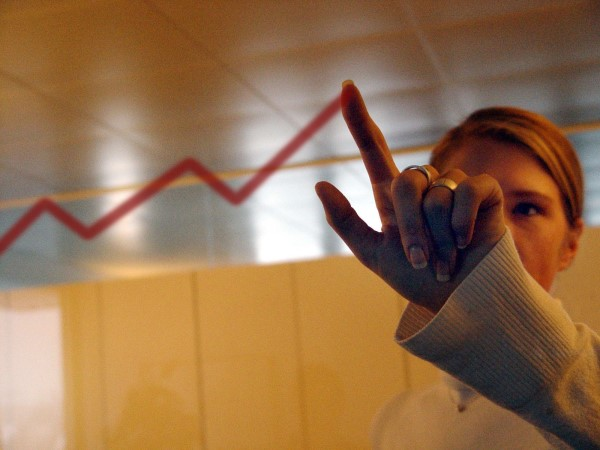


<font size="-1">Image Credit: <a href="https://www.freeimages.com/es/photo/sales-figures-1473495">wagg66</a> from <a href="https://www.freeimages.com">FreeImages</a></font>.

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1. [Background](#background)<br>
    1.2. [General Objective](#objective)<br>
    1.3. [Research Question](#question)<br>
    1.4. [Hypothesis](#hypothesis)<br>
    1.5. [Abridged Methodology](#methodology)<br>
    1.6. [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Exploration**](#exploration)<br>
    3.1 [Data Description](#description)<br>
    3.2 [Data Quality](#quality)<br>
    3.3 [Initial Data Analysis](#ida)<br>    
4. [**Data Preparation**](#preparation)<br>
    4.1 [Data Selection](#selection)<br>
    4.2 [Attributes Renaming](#selection)<br>
    4.3 [Data Types Adjustment](#datatypes)<br>
    4.4 [Missing Values Handling](#missing_values)<br>
    4.5 [Derived Attributes Construction](#derived_attributes)<br>
    4.6 [Data Aggregation](#aggregation)<br>
    4.7 [Data Integration](#integration)<br>
5. [**Exploratory Data Analysis**](#eda)<br>
    5.1 [Statistical Measures](#statistical_measures)<br>
    5.2 [Time Trends](#time_trends)<br>
    5.3 [Distributions and Relationships](#dist_rel)<br>
    5.4 [Correlations](#correlations)<br>
    5.3 [Differencing](#diff)<br>
6. [**Data Modeling**](#modeling)<br>
    6.1 [Predictors and Response Split](#split)<br>
    6.2 [Multivariate Time Series Model](#time_series)<br>
    6.3 [Regression Model](#regression)<br>    
7. [**Evaluation**](#modeling)<br>
8. [**Conclusions**](#conclusions)<br>
9. [**References**](#references)<br>


<a class="anchor" id="intro"></a>
___
## **1. Introduction**
___


### **1.1 Background** <a class="anchor" id="intro"></a>

In the ever-changing world of today, it is of the utmost importance to be able to quantify the impact of the external economic indicators in the performance of an organization.

In the context of Mexico, it is possible to collect public data from different government offices such as INEGI or BANXICO, or from international sources such as the S&P500, and to assess how they correlate to the monthly revenue.

Walmart of Mexico (or WALMEX) is one of the most important retail companies within the region, with 3,903 stores in Mexico and Central America, an equity of 199,086,037 MXN, and a yearly revenue of 880,121,761 MXN, according to the figures from December 2023; and, as of February 2024, the goal of WALMEX is to double its sales in a period of 10 years [(Wal-Mart de México S.A.B. de C.V., 2024)](#walmex).

In this sense, the purpose of the present proyect is to predict several economic indicators over the next few years and, then, use them to predict whether Walmart of Mexico will be able to achieve its goal.

### **1.2 General Objective** <a class="anchor" id="objective"></a>

To predict whether Walmart of Mexico will double its sales within the next ten years.

### **1.3 Research question** <a class="anchor" id="question"></a>

Will Walmart of Mexico be able to double its sales within the next ten years? If so, when?

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>

Walmart de México will manage to double its sales within the next ten years.

### **1.5 Methodology** <a class="anchor" id="methodology"></a>

The methodology of the present study is based on Rollin’s *Foundational Methodology for Data Science* [(Rollins, 2015)](#rollins):

1. **Analytical approach**: Building and evaluation of **multivariate time series** and **a regression models**.
2. **Data requirements**: Data about WALMEX's net sales, WALMEX stock value, IPC index, SP&500 index, MXN/USD exchange rate, bonds interest rate (CETES28), money market representative interest rates (28 day TIIE), inflation, and gross domestic product (GDP) of Mexico.
3. **Data collection**: Data from a period of the last 10 years (from 01 Feb 2014 to 01 Feb 2024) was collected from <a href="https://finance.yahoo.com/">Yahoo Finance</a>, <a href="https://www.walmex.mx/en/financial-information/annual.html">Walmex's investors website</a>, <a href="https://www.inegi.org.mx/">INEGI</a>, and <a href="https://www.banxico.org.mx/">Banxico</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned and prepared with Python 3 and its libraries Numpy and Pandas.
6. **Data modeling**: Firstly, the dataset was split in training, validation and testing sets. Then, a **RNN** was created and trained in Python 3 and its libraries Keras and Tensorflow to predict the values of the selected macroeconomic indicators as a multivariate time series. After that, a **regression model** was built using Tensorflow and Keras to predict WALMEX total sales based on the predictions of the selected macroeconomic indicators. ReLU was used as the activation function for the output layer and hidden layers. Furthermore, the mean square error (MSE) loss function and the Adam optimizer were used for the model compilation. Several architectures for the time series and regression model were tested.
7. **Evaluation**: The comparison among predicted and actual sales were primarily evaluated through the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and Coefficient of Determination $(r^{2})$.
8. **Implementation**: An app was built and deployed with Streamlit and Plotly.

### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of the present notebook is to collect, explore, prepare, model and evaluate the data from the different sources.


In [133]:
# Loading Requirements Text File
# %pip install -r requirements.txt

In [134]:
# Libraries installation
# %pip install ipykernel
# %pip install numpy
# %pip install pandas
# %pip install yfinance
# %pip install openpyxl
# %pip install matplotlib
# %pip install seaborn

In [135]:
# Libraries importation
import numpy as np
import pandas as pd
import yfinance as yf
import json
from urllib.request import urlopen 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_inline.backend_inline
import seaborn as sns
import warnings

In [136]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

# Disabling warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="collection"></a>
___
## **2. Data Collection**
___


First, the stock close values of WALMEX, and the index values from the IPC and the S&P500 were retrieved from the API of *Yahoo! Finance* through the library **yfinance**.

In [137]:
# Retrieving market data for WALMEX, IPC and S&P500
stocks = ["WALMEX.MX", "^MXX", "^GSPC"]
stocks_df = yf.download(stocks, start="2014-02-01", end="2024-02-01")['Close']
stocks_df.head()

[*********************100%%**********************]  3 of 3 completed


Ticker      WALMEX.MX        ^GSPC          ^MXX
Date                                            
2014-02-03        NaN  1741.890015           NaN
2014-02-04  31.500000  1755.199951  40085.519531
2014-02-05  31.379999  1751.640015  39880.871094
2014-02-06  31.190001  1773.430054  40288.781250
2014-02-07  29.850000  1797.020020  40525.738281

Then, WALMEX sales figures were retrieved from the <a href="https://www.walmex.mx/en/financial-information/annual.html">Walmex's investors website</a>. As the financial data was disclosed in a quaterly basis in 40 PDF files hosted on a variety of inconsistent links, for sake of efficiency, it was decided to collect the data manually and consolidate it in an Excel file. 

The amount of files was sizeable for manual handling, and the complexity of developing a script for scraping and parsing each file was too high to just retrieve the account of *Net sales*. Thus, it was decided to proceed in a manual fashion.

In [138]:
# Loading sales data 
link = 'https://github.com/DanielEduardoLopez/SalesPrediction/raw/main/Walmex_Quarterly_Net_Sales.xlsx'
sales_df = pd.read_excel(link)
sales_df.head()

Year Quarter  Net Sales (mdp)  Units  Sq.mt. Mexico  Sq.mt. Central America
0  2014      Q1           101405   2867            NaN                     NaN
1  2014      Q2           103300   2879            NaN                     NaN
2  2014      Q3           104367   2904            NaN                     NaN
3  2014      Q4           128586   2983            NaN                     NaN
4  2015      Q1           110875   2987            NaN                     NaN

Later, the GDP and inflation data were retrieved from <a href='https://www.inegi.org.mx/servicios/api_indicadores.html'>INEGI's Query Constructor</a>, saving the response JSON files into disk, and then loading them into the notebook.

In [139]:
# Loading GDP data
gdp_link = "https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/gdp_data.json"

response = urlopen(gdp_link) 

gdp_json = json.loads(response.read())

In [140]:
# Retrieving series
gdp_dict = gdp_json["Series"][0]["OBSERVATIONS"]

In [141]:
# Converting dict into a dataframe
gdp_df = pd.DataFrame.from_dict(gdp_dict, orient='columns')
gdp_df.head()

TIME_PERIOD     OBS_VALUE OBS_EXCEPTION OBS_STATUS OBS_SOURCE OBS_NOTE  \
0     2023/04  25596360.563                        1         17     None   
1     2023/03  25121269.269                                  17     None   
2     2023/02  25001939.978                                  17     None   
3     2023/01  24291956.149                                  17     None   
4     2022/04  24981146.477                                  17     None   

  COBER_GEO  
0        00  
1        00  
2        00  
3        00  
4        00

It is noteworthy that the GDP values are sorted descending according to the time period, which is inconsistent with the other datasets, so, the GDP dataset was sorted ascending.

In [142]:
gdp_df = gdp_df.sort_values(by='TIME_PERIOD', ascending=True).reset_index(drop=True)
gdp_df.head()

TIME_PERIOD     OBS_VALUE OBS_EXCEPTION OBS_STATUS OBS_SOURCE OBS_NOTE  \
0     1980/01  10401367.607                                  17     None   
1     1980/02      10342350                                  17     None   
2     1980/03  10392733.012                                  17     None   
3     1980/04  10927666.353                                  17     None   
4     1981/01  11345848.491                                  17     None   

  COBER_GEO  
0        00  
1        00  
2        00  
3        00  
4        00

Finally, the MXN/USD exchange rates, the bonds interest rates (CETES 28), and the money market representative interest rates (28 day TIIE) data were retrieved from <a href="https://www.banxico.org.mx/">Banxico's website</a> in form of CSV files.

In [143]:
# Loading MXN/USD exchange rates data
exchange_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/exchange_rates_data.csv'
exchange_rates_df = pd.read_csv(exchange_rates_link, encoding = "ISO-8859-1")
exchange_rates_df.head(15)

Banco de México  \
0                                                 NaN   
1   Exchange rates and auctions historical informa...   
2                             Tipos de cambio diarios   
3                                                 NaN   
4                           Date: 03/02/2024 06:14:08   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                               Title   
9                                    Information type   
10                                               Date   
11                                         01/01/2014   
12                                         01/02/2014   
13                                         01/03/2014   
14                                         01/04/2014   

                                           Unnamed: 1  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8   Exchange rate pesos per US dollar, Used to set...  
9                                              Levels  
10                                            SF60653  
11                                            13.0652  
12                                            13.0652  
13                                            13.0843  
14                                            13.1011

In [144]:
# Loading bonds interest rates data
bonds_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/bonds_rates_data.csv'
bonds_rates_df = pd.read_csv(bonds_rates_link, encoding = "ISO-8859-1")
bonds_rates_df.head(15)

Banco de México  \
0                                              NaN   
1   Securities auctions and Open Market Operations   
2                          Valores Gubernamentales   
3                                              NaN   
4                        Date: 03/02/2024 06:05:53   
5                                              NaN   
6                                              NaN   
7                                              NaN   
8                                            Title   
9                                 Information type   
10                                            Date   
11                                      01/02/2014   
12                                      01/09/2014   
13                                      01/16/2014   
14                                      01/23/2014   

                                           Unnamed: 1  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8   Bonds Issued by Public Agencies Weekly auction...  
9                                              Levels  
10                                            SF43936  
11                                               3.16  
12                                               3.17  
13                                               3.05  
14                                               3.13

In [145]:
# Loading bonds interest rates data
interest_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/interest_rates_data.csv'
interest_rates_df = pd.read_csv(interest_rates_link, encoding = "ISO-8859-1")
interest_rates_df.head(15)

Banco de México  \
0                                        NaN   
1       Securities prices and interest rates   
2   Tasas de Interés en el Mercado de Dinero   
3                                        NaN   
4                  Date: 03/02/2024 06:10:39   
5                                        NaN   
6                                        NaN   
7                                        NaN   
8                                      Title   
9                           Information type   
10                                      Date   
11                                01/02/2014   
12                                01/03/2014   
13                                01/06/2014   
14                                01/07/2014   

                                      Unnamed: 1  
0                                            NaN  
1                                            NaN  
2                                            NaN  
3                                            NaN  
4                                            NaN  
5                                            NaN  
6                                            NaN  
7                                            NaN  
8   28 day TIIE, Interest rate in annual percent  
9                                         Levels  
10                                       SF43783  
11                                         3.795  
12                                         3.795  
13                                        3.7925  
14                                        3.7962

<a class="anchor" id="exploration"></a>
___
## **3. Data Exploration**
___

In this section, the collected datasets were explored to describe its attributes, number of records, shapes, data types, their quality in terms of its percentage of missing values and suspected extreme outliers; as well as explore the statistical measures, time trends, distributions and relationships among variables.

### **3.1 Data Description** <a class="anchor" id="description"></a>

#### **Stock Dataset**

In [146]:
# Preview of dataset
stocks_df.head()

Ticker      WALMEX.MX        ^GSPC          ^MXX
Date                                            
2014-02-03        NaN  1741.890015           NaN
2014-02-04  31.500000  1755.199951  40085.519531
2014-02-05  31.379999  1751.640015  39880.871094
2014-02-06  31.190001  1773.430054  40288.781250
2014-02-07  29.850000  1797.020020  40525.738281

In [147]:
stocks_df.tail()

Ticker      WALMEX.MX        ^GSPC          ^MXX
Date                                            
2024-01-25  69.279999  4894.160156  56160.070312
2024-01-26  70.699997  4890.970215  56855.878906
2024-01-29  70.349998  4927.930176  57175.730469
2024-01-30  71.919998  4924.970215  57537.140625
2024-01-31  71.089996  4845.649902  57372.761719

In [148]:
# Basic info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584 entries, 2014-02-03 to 2024-01-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WALMEX.MX  2515 non-null   float64
 1   ^GSPC      2516 non-null   float64
 2   ^MXX       2514 non-null   float64
dtypes: float64(3)
memory usage: 80.8 KB


In [149]:
# Basic statistical description
stocks_df.describe()

Ticker    WALMEX.MX        ^GSPC          ^MXX
count   2515.000000  2516.000000   2514.000000
mean      52.796288  3030.773772  46462.182669
std       13.482746   909.474790   4687.222880
min       28.059999  1741.890015  32964.218750
25%       42.039999  2138.630066  43406.756836
50%       52.689999  2810.109985  46047.953125
75%       65.530003  3930.392578  49939.346680
max       81.919998  4927.930176  57745.789062

In [150]:
# Shape of dataset
stocks_df.shape

(2584, 3)

So, the stock dataset comprises 2584 daily observations of the close value of WALMEX.MX, GSPC (S&P 500) and MXX (IPC).

#### **Sales Dataset**

In [151]:
# Preview of the dataset
sales_df.head()

Year Quarter  Net Sales (mdp)  Units  Sq.mt. Mexico  Sq.mt. Central America
0  2014      Q1           101405   2867            NaN                     NaN
1  2014      Q2           103300   2879            NaN                     NaN
2  2014      Q3           104367   2904            NaN                     NaN
3  2014      Q4           128586   2983            NaN                     NaN
4  2015      Q1           110875   2987            NaN                     NaN

In [152]:
sales_df.tail()

Year Quarter  Net Sales (mdp)  Units  Sq.mt. Mexico  \
35  2022      Q4           236272   3745      6655421.0   
36  2023      Q1           204601   3755      6659477.0   
37  2023      Q2           212164   3775      6688133.0   
38  2023      Q3           211436   3802      6706432.0   
39  2023      Q4           251921   3903      6831809.0   

    Sq.mt. Central America  
35                815407.0  
36                818300.0  
37                818300.0  
38                819264.0  
39                821822.0

In [153]:
# Basic info of the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    40 non-null     int64  
 1   Quarter                 40 non-null     object 
 2   Net Sales (mdp)         40 non-null     int64  
 3   Units                   40 non-null     int64  
 4   Sq.mt. Mexico           27 non-null     float64
 5   Sq.mt. Central America  27 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.0+ KB


In [154]:
# Basic statistical description
sales_df.describe()

Year  Net Sales (mdp)        Units  Sq.mt. Mexico  \
count    40.000000        40.000000    40.000000   2.700000e+01   
mean   2018.500000    160831.950000  3311.700000   6.393321e+06   
std       2.908872     37308.578943   300.161512   2.190696e+05   
min    2014.000000    101405.000000  2867.000000   6.035180e+06   
25%    2016.000000    130929.000000  3041.500000   6.203962e+06   
50%    2018.500000    160334.500000  3254.000000   6.403496e+06   
75%    2021.000000    188321.250000  3545.750000   6.553819e+06   
max    2023.000000    251921.000000  3903.000000   6.831809e+06   

       Sq.mt. Central America  
count               27.000000  
mean            780801.370370  
std              39569.845038  
min             689820.000000  
25%             753962.000000  
50%             799486.000000  
75%             807843.500000  
max             821822.000000

In [155]:
# Shape of dataset
sales_df.shape

(40, 6)

#### **GDP Dataset**

In [156]:
# Preview of the dataset
gdp_df.head()

TIME_PERIOD     OBS_VALUE OBS_EXCEPTION OBS_STATUS OBS_SOURCE OBS_NOTE  \
0     1980/01  10401367.607                                  17     None   
1     1980/02      10342350                                  17     None   
2     1980/03  10392733.012                                  17     None   
3     1980/04  10927666.353                                  17     None   
4     1981/01  11345848.491                                  17     None   

  COBER_GEO  
0        00  
1        00  
2        00  
3        00  
4        00

In [157]:
gdp_df.tail()

TIME_PERIOD     OBS_VALUE OBS_EXCEPTION OBS_STATUS OBS_SOURCE OBS_NOTE  \
171     2022/04  24981146.477                                  17     None   
172     2023/01  24291956.149                                  17     None   
173     2023/02  25001939.978                                  17     None   
174     2023/03  25121269.269                                  17     None   
175     2023/04  25596360.563                        1         17     None   

    COBER_GEO  
171        00  
172        00  
173        00  
174        00  
175        00

In [158]:
# Basic info of the dataset
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    176 non-null    object
 1   OBS_VALUE      176 non-null    object
 2   OBS_EXCEPTION  176 non-null    object
 3   OBS_STATUS     176 non-null    object
 4   OBS_SOURCE     176 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      176 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [159]:
# Basic statistical description
gdp_df.describe()

TIME_PERIOD     OBS_VALUE OBS_EXCEPTION OBS_STATUS OBS_SOURCE OBS_NOTE  \
count          176           176           176        176        176        0   
unique         176           176             1          3          1        0   
top        1980/01  10401367.607                                  17      NaN   
freq             1             1           176        174        176      NaN   

       COBER_GEO  
count        176  
unique         1  
top           00  
freq         176

In [160]:
# Shape of dataset
gdp_df.shape

(176, 7)

#### **Exchange Rates Dataset**

In [161]:
# Preview of the dataset
exchange_rates_df.head(10)

Banco de México  \
0                                                NaN   
1  Exchange rates and auctions historical informa...   
2                            Tipos de cambio diarios   
3                                                NaN   
4                          Date: 03/02/2024 06:14:08   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                              Title   
9                                   Information type   

                                          Unnamed: 1  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  
7                                                NaN  
8  Exchange rate pesos per US dollar, Used to set...  
9                                             Levels

In [162]:
# Preview of the dataset
exchange_rates_df.tail()

Banco de México Unnamed: 1
3723      03/01/2024    17.0962
3724      03/02/2024    17.0633
3725      03/03/2024    17.0633
3726      03/04/2024    17.0633
3727      03/05/2024    17.0217

In [163]:
# Basic info of the dataset
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  3723 non-null   object
 1   Unnamed: 1       3720 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [164]:
# Basic statistical description
exchange_rates_df.describe()

Banco de México Unnamed: 1
count                                                3723       3720
unique                                               3723       2494
top     Exchange rates and auctions historical informa...    20.1175
freq                                                    1          7

In [165]:
# Shape of dataset
exchange_rates_df.shape

(3728, 2)

#### **Bonds Interest Rates Dataset**

In [166]:
# Preview of the dataset
bonds_rates_df.head(10)

Banco de México  \
0                                             NaN   
1  Securities auctions and Open Market Operations   
2                         Valores Gubernamentales   
3                                             NaN   
4                       Date: 03/02/2024 06:05:53   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                           Title   
9                                Information type   

                                          Unnamed: 1  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  
7                                                NaN  
8  Bonds Issued by Public Agencies Weekly auction...  
9                                             Levels

In [167]:
bonds_rates_df.tail()

Banco de México Unnamed: 1
537      02/01/2024      11.15
538      02/08/2024      11.06
539      02/15/2024      11.05
540      02/22/2024         11
541      02/29/2024         11

In [168]:
# Basic info of the dataset
bonds_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  537 non-null    object
 1   Unnamed: 1       534 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


In [169]:
bonds_rates_df.describe()

Banco de México Unnamed: 1
count                                              537        534
unique                                             537        301
top     Securities auctions and Open Market Operations       3.05
freq                                                 1          7

In [170]:
# Shape of dataset
bonds_rates_df.shape

(542, 2)

#### **Money Market Interest Rates Dataset**

In [171]:
# Preview of the dataset
interest_rates_df.head(10)

Banco de México  \
0                                       NaN   
1      Securities prices and interest rates   
2  Tasas de Interés en el Mercado de Dinero   
3                                       NaN   
4                 Date: 03/02/2024 06:10:39   
5                                       NaN   
6                                       NaN   
7                                       NaN   
8                                     Title   
9                          Information type   

                                     Unnamed: 1  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
5                                           NaN  
6                                           NaN  
7                                           NaN  
8  28 day TIIE, Interest rate in annual percent  
9                                        Levels

In [172]:
interest_rates_df.tail()

Banco de México Unnamed: 1
2565      02/27/2024    11.4891
2566      02/28/2024      11.49
2567      02/29/2024    11.4875
2568      03/01/2024    11.4937
2569      03/04/2024     11.485

In [173]:
# Basic info of the dataset
interest_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  2565 non-null   object
 1   Unnamed: 1       2562 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


In [174]:
interest_rates_df.describe()

Banco de México Unnamed: 1
count                                   2565       2562
unique                                  2565       1730
top     Securities prices and interest rates        3.3
freq                                       1         31

In [175]:
# Shape of dataset
interest_rates_df.shape

(2570, 2)

### **3.2 Data Quality** <a class="anchor" id="quality"></a>

#### **Missing values** <a class="anchor" id="missing"></a>

Missing data is common issue in real datasets. Thus, in the present section, the datasets were assessed to identify the number of missing values and its percentage.

In [176]:
# Function to calculate the percentage of missing values for each column in the dataset

def missing_values_summary(df):
        """
        Calculates the number of missing values and its corresponding percentage of total values 
        for each column in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe.

        Returns

        mis_val_table_df: Table with the number of missing values and its corresponding percentage for each column.

        """        
        mis_val = df.isnull().sum()

        mis_val_percentage = (mis_val / len(df)) * 100

        mis_val_table_df = pd.concat([pd.Series(mis_val.index), pd.Series(mis_val.values), 
                                   pd.Series(mis_val_percentage.values)], axis=1)
        
        mis_val_table_df.columns = ['Attribute', 'Missing Values Count', 'Missing Values Rate (%)']

        mis_val_table_df = mis_val_table_df[
            mis_val_table_df.iloc[:,1] != 0].sort_values(
        'Missing Values Rate (%)', ascending=False).round(2)
        
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_df.shape[0]) + " attributes that have missing values.")
        
        return mis_val_table_df

In [177]:
# Mising data in stocks dataset
missing_values_summary(stocks_df)

Dataset has 3 columns.
There are 3 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
2       ^MXX                    70                     2.71
0  WALMEX.MX                    69                     2.67
1      ^GSPC                    68                     2.63

In [178]:
# Mising data in sales dataset
missing_values_summary(sales_df)

Dataset has 6 columns.
There are 2 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
4           Sq.mt. Mexico                    13                     32.5
5  Sq.mt. Central America                    13                     32.5

In [179]:
# Mising data in gdp dataset
missing_values_summary(gdp_df)

Dataset has 7 columns.
There are 1 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
5  OBS_NOTE                   176                    100.0

In [180]:
# Mising data in exchange rates dataset
missing_values_summary(exchange_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
1       Unnamed: 1                     8                     0.21
0  Banco de México                     5                     0.13

In [181]:
# Mising data in bonds rates dataset
missing_values_summary(bonds_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
1       Unnamed: 1                     8                     1.48
0  Banco de México                     5                     0.92

In [182]:
# Mising data in interest rates dataset
missing_values_summary(interest_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


Attribute  Missing Values Count  Missing Values Rate (%)
1       Unnamed: 1                     8                     0.31
0  Banco de México                     5                     0.19

So, several attributes in the datasets have missing values, the vast majority in a small extent. So, the method **dropna()** should be sufficient to handle those missing values. 

However, in the case of the attributes *OBS_NOTE* in the gdp dataset, or *Sq.mt. Mexico* and *Sq.mt. Central America* in the sales dataset, whose missing values rates (%) are higher than 30%, they will be removed.

#### **Outliers** <a class="anchor" id="outliers"></a>

Likewise, the datasets were assessed to identify any outliers.

In [183]:
# Function to calculate outliers based on the interquartile range
def count_outliers(series):
        """ 
        Returns the number of suspected extreme outliers and its corresponding rate based on the rule of: +-interquartile range * 3 
        (NIST/SEMATECH, 2012).

        Parameters

        series: Vector of numerical data in the format of a Pandas series.

        Returns

        outliers_count: Number of suspected extreme outliers in the input data.
        outliers_percentage: Rate of suspected extreme outliers in the input data.

        """
        x = series.dropna()

        q3, q1 = np.percentile(x, [75, 25])

        iqr = q3 - q1

        lower_limit = q1 - iqr * 3
        upper_limit = q3 + iqr * 3

        mask = np.bitwise_and(x > lower_limit, x < upper_limit)

        data_count = x.shape[0]

        outliers_count = data_count - x.loc[mask].shape[0]

        outliers_percentage = round((outliers_count / data_count) * 100, 2)
        
        return outliers_count, outliers_percentage

In [184]:
def outliers_summary(df):
        """ 
        Calculates the number of outliers and its corresponding percentage of total values
        for each numeric column in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe.

        Returns

        outliers_table_df: Table with the number of suspected outliers and its corresponding rate for each column.

        """

        outliers_count_list = []

        outliers_percentage_list = []

        columns_list = list(df.select_dtypes(include='number').columns)

        for col in columns_list:

            outliers_count, outliers_percentage = count_outliers(df[col])

            outliers_count_list.append(outliers_count)
            outliers_percentage_list.append(outliers_percentage)
        
        outliers_dict = {'Attribute': columns_list, 
                        'Outliers Count':outliers_count_list, 
                        'Outliers Rate (%)': outliers_percentage_list}
        
        outliers_table_df = pd.DataFrame(outliers_dict)    

        outliers_table_df = outliers_table_df.loc[outliers_table_df['Outliers Count']>0,:].sort_values(by='Outliers Count', ascending=False)

        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(outliers_table_df.shape[0]) + " attributes that have suspected extreme outliers.")

        return outliers_table_df 

In [185]:
# Suspected outliers in stocks dataset
outliers_summary(stocks_df)

Dataset has 3 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

In [186]:
# Suspected outliers in sales dataset
outliers_summary(sales_df)

Dataset has 6 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

In [187]:
# Suspected outliers in GDP dataset
outliers_summary(gdp_df)

Dataset has 7 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

In [188]:
# Suspected outliers in exchange rates dataset
outliers_summary(exchange_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

In [189]:
# Suspected outliers in bonds rates dataset
outliers_summary(bonds_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

In [190]:
# Suspected outliers in interest rates dataset
outliers_summary(interest_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


Empty DataFrame
Columns: [Attribute, Outliers Count, Outliers Rate (%)]
Index: []

Thus, the datasets are free from extreme outliers.

### **3.3 Initial Data Analysis** <a class="anchor" id="ida"></a>

In this section, the data was initialy analyzed to calculate simple statistical measures, identify time trends, explore distributions and relationships.

#### **Statistical measures**

The basic statistical measures of the stocks dataset is as follows:

In [191]:
stocks_df.describe()

Ticker    WALMEX.MX        ^GSPC          ^MXX
count   2515.000000  2516.000000   2514.000000
mean      52.796288  3030.773772  46462.182669
std       13.482746   909.474790   4687.222880
min       28.059999  1741.890015  32964.218750
25%       42.039999  2138.630066  43406.756836
50%       52.689999  2810.109985  46047.953125
75%       65.530003  3930.392578  49939.346680
max       81.919998  4927.930176  57745.789062

On the other hand, the basic statistical measures of the sales dataset are shown below:

In [192]:
sales_df.drop(columns=['Year', 'Quarter']).describe()

Net Sales (mdp)        Units  Sq.mt. Mexico  Sq.mt. Central America
count        40.000000    40.000000   2.700000e+01               27.000000
mean     160831.950000  3311.700000   6.393321e+06           780801.370370
std       37308.578943   300.161512   2.190696e+05            39569.845038
min      101405.000000  2867.000000   6.035180e+06           689820.000000
25%      130929.000000  3041.500000   6.203962e+06           753962.000000
50%      160334.500000  3254.000000   6.403496e+06           799486.000000
75%      188321.250000  3545.750000   6.553819e+06           807843.500000
max      251921.000000  3903.000000   6.831809e+06           821822.000000

The statistical measures of the GDP dataset are shown below:

In [193]:
gdp_df[['OBS_VALUE']].astype(float).describe()

OBS_VALUE
count  1.760000e+02
mean   1.739801e+07
std    4.650498e+06
min    1.034235e+07
25%    1.270458e+07
50%    1.783120e+07
75%    2.148982e+07
max    2.559636e+07

Finally, the statistical measures of the exchange rates, bonds rates, and interest rates datasets are shown below:

In [194]:
exchange_rates_df.iloc[11:,1].astype(float).to_frame().describe()

Unnamed: 1
count  3717.000000
mean     18.466568
std       2.395290
min      12.846200
25%      17.295700
50%      18.938500
75%      19.991300
max      25.118500

In [195]:
bonds_rates_df.iloc[11:,1].astype(float).to_frame().describe()

Unnamed: 1
count  531.000000
mean     6.160000
std      2.591843
min      2.430000
25%      4.015000
50%      6.240000
75%      7.740000
max     11.400000

In [196]:
interest_rates_df.iloc[11:,1].astype(float).to_frame().describe()

Unnamed: 1
count  2559.000000
mean      6.515711
std       2.587540
min       3.274100
25%       4.281500
50%       6.600000
75%       8.115950
max      11.566900

#### **Time trends**

In [197]:
def plot_linechart(df):
        """"
        Function to plot a linechart using seaborn

        Parameters
        
        df: Dataser in the format of a Panda's dataframe

        Returns

        None
        """
        
        columns = list(df.columns)

        for col in columns:

            plt.subplots(figsize=(7,5))
            
            sns.lineplot(data=df,
                        x=df.index,
                        y=df[col],             
                        legend=False
                        )
            
            xlabel=df.index.name.title()
            ylabel=df[col].name.title()

            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.title(f'{ylabel} by {xlabel}')

            plt.xticks([])


The time trends of the stocks dataset are plot below:

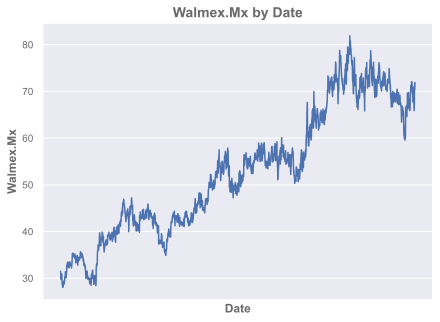

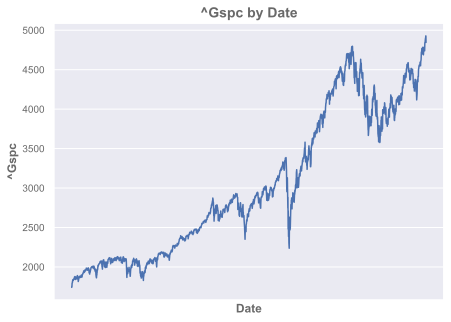

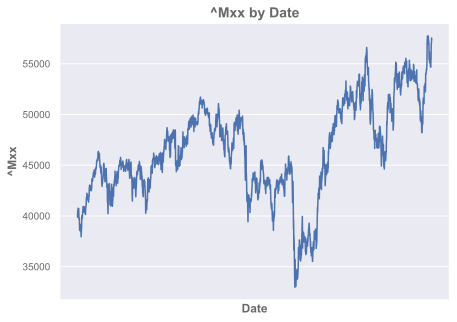

In [198]:
plot_linechart(stocks_df)

The stock value of WALMEX and S&P500 have a strong positive trend; whereas the Mexican IPC has a weak one.

The time trends of the sales dataset are shown below:

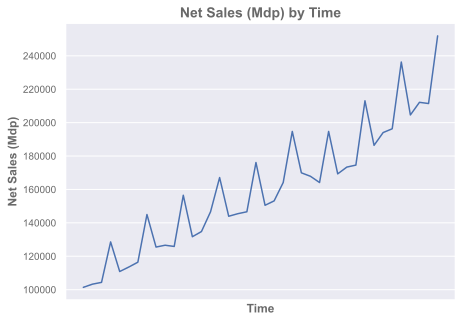

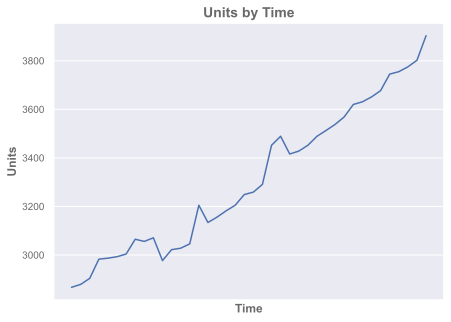

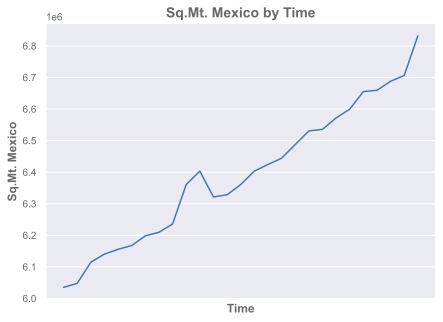

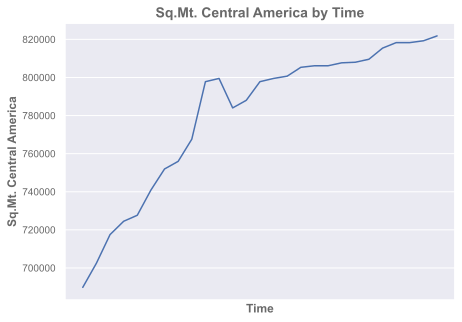

In [199]:
plot_linechart(sales_df.drop(columns=['Year', 'Quarter']).rename_axis('Time'))

The net sales of WALMEX exhibits a positive trend with seasonality. Units, and commercial area in both Mexico and Central America showed a positive trend.

Moreover, the time trend of the GDP dataset is shown below:

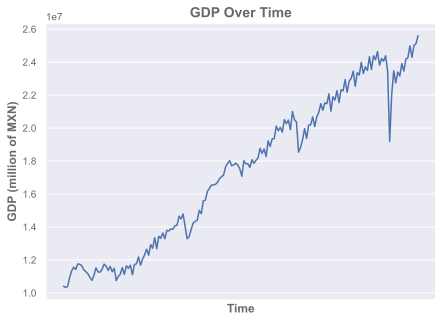

In [200]:
plot_linechart(gdp_df[['OBS_VALUE']].astype(float).rename_axis('Time'))
plt.title('GDP Over Time')
plt.xlabel('Time')
plt.ylabel('GDP (million of MXN)')
plt.show()

Mexican GDP showed a positive trend over the last 10 years with a sharply temporary decrease during the Covid pandemic.

The time trend of the exchange rates dataset is shown below:

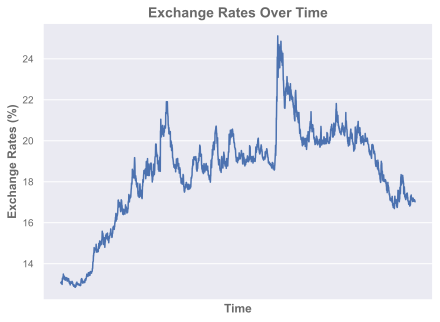

In [201]:
plot_linechart(exchange_rates_df.iloc[11:,1].astype(float).to_frame().rename_axis('Time'))
plt.title('Exchange Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Exchange Rates (%)')
plt.show()

The exchange rate showed a weak positive trend over the last ten years.

The time trend of the bonds rates dataset is shown below:

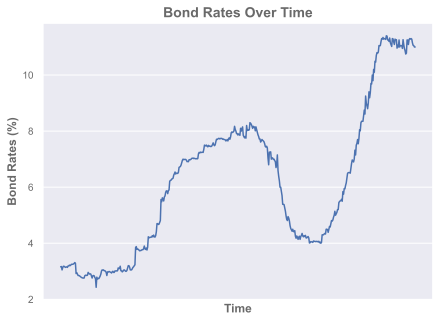

In [202]:
plot_linechart(bonds_rates_df.iloc[11:,1].astype(float).to_frame().rename_axis('Time'))
plt.title('Bond Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Bond Rates (%)')
plt.show()

The time trend of the interest rates dataset is shown below:

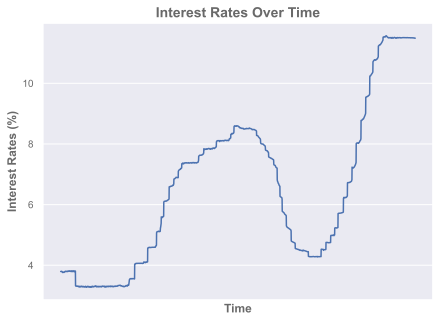

In [203]:
plot_linechart(interest_rates_df.iloc[11:,1].astype(float).to_frame().rename_axis('Time'))
plt.title('Interest Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Interest Rates (%)')
plt.show()

Both bonds and money market interest rates showed an arbitrary trend, as those rates are set by the Central Bank of Mexico according to their contractive inflation policy.

#### **Distributions**

The distributions of the variables of the stocks dataset are shown below by a means of histograms:

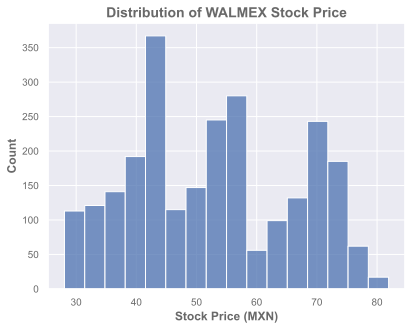

In [204]:
sns.histplot(stocks_df['WALMEX.MX'])
plt.title('Distribution of WALMEX Stock Price')
plt.xlabel('Stock Price (MXN)')
plt.ylabel('Count')
plt.show()

The stock value for WALMEX seems to show three diferent distributions.

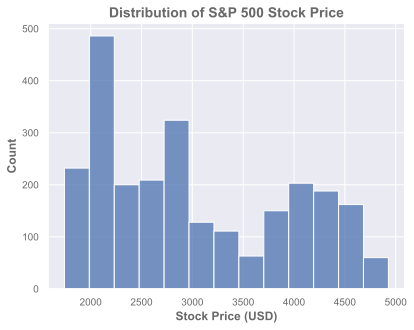

In [205]:
sns.histplot(stocks_df['^GSPC'])
plt.title('Distribution of S&P 500 Stock Price')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Count')
plt.show()

The stock value of the S&P500 is skewed to the right.

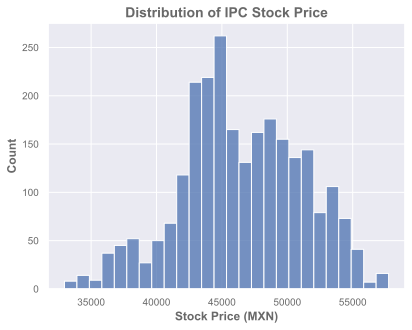

In [206]:
sns.histplot(stocks_df['^MXX'])
plt.title('Distribution of IPC Stock Price')
plt.xlabel('Stock Price (MXN)')
plt.ylabel('Count')
plt.show()

The stock value of the IPC exhibits a normal distribution.

The distributions of the variables in the sales dataset are shown below by a means of histograms:

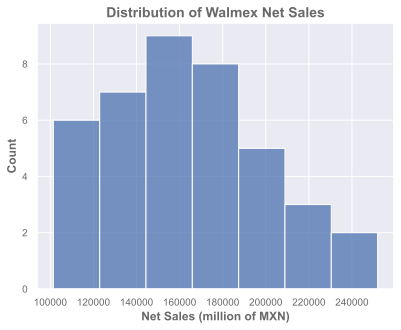

In [207]:
sns.histplot(sales_df['Net Sales (mdp)'])
plt.title('Distribution of Walmex Net Sales')
plt.xlabel('Net Sales (million of MXN)')
plt.ylabel('Count')
plt.show()

The net sales of WALMEX shows a normal distribution somewhat skewed to the right.

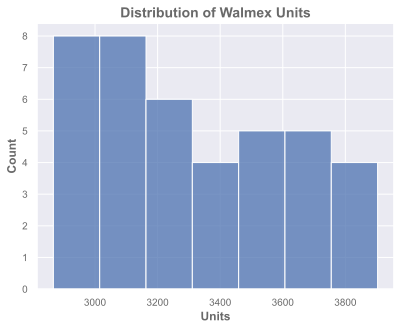

In [208]:
sns.histplot(sales_df['Units'])
plt.title('Distribution of Walmex Units')
plt.xlabel('Units')
plt.ylabel('Count')
plt.show()

The units data of WALMEX seems to show a uniform distribution.

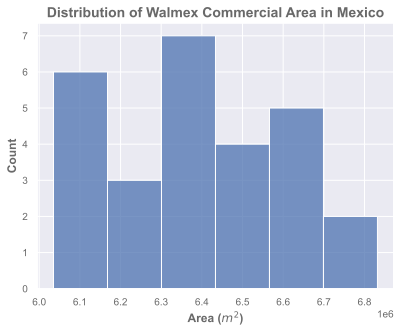

In [209]:
sns.histplot(sales_df['Sq.mt. Mexico'])
plt.title('Distribution of Walmex Commercial Area in Mexico')
plt.xlabel(r'Area ($m^{2}$)')
plt.ylabel('Count')
plt.show()

The commercial area for Mexico barely resembles a normal distribuition.

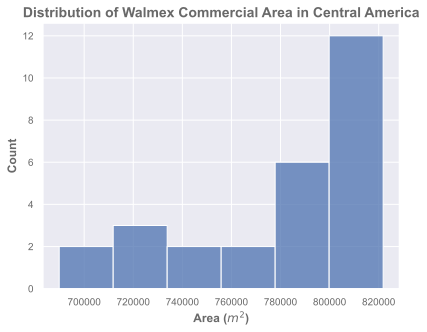

In [210]:
sns.histplot(sales_df['Sq.mt. Central America'])
plt.title('Distribution of Walmex Commercial Area in Central America')
plt.xlabel(r'Area ($m^{2}$)')
plt.ylabel('Count')
plt.show()

The commercial area for Central America data is skewed to the left.

The distribution of the GDP dataset is shown below:

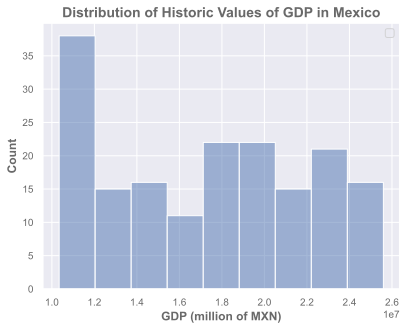

In [211]:
# Exploring distribution with histogram
sns.histplot(gdp_df[['OBS_VALUE']].astype(float))
plt.title('Distribution of Historic Values of GDP in Mexico')
plt.xlabel('GDP (million of MXN)')
plt.ylabel('Count')
plt.legend('')
plt.show()

The distribution of the GDP is skewed to the right.

The distribution of the exchange rates dataset is shown below:

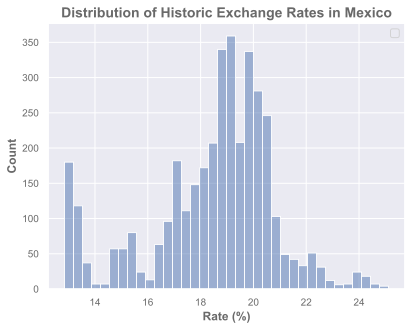

In [212]:
# Exploring distribution with histogram
sns.histplot(exchange_rates_df.iloc[11:,1].astype(float).to_frame())
plt.title('Distribution of Historic Exchange Rates in Mexico')
plt.xlabel('Rate (%)')
plt.ylabel('Count')
plt.legend('')
plt.show()

The exchange rates dataset shows two distributions. The first distribution (at the left of the histogram) is skewed to the right, and the second one (at the center of the histogram) resembles a normal distribution.

The distribution of the bonds rates dataset is shown below:

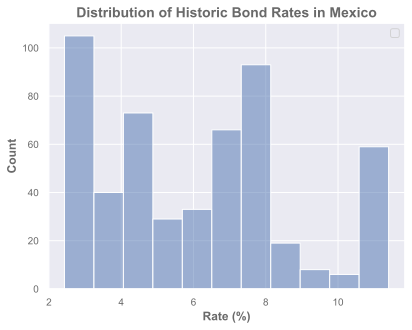

In [213]:
# Exploring distribution with histogram
sns.histplot(bonds_rates_df.iloc[11:,1].astype(float).to_frame())
plt.title('Distribution of Historic Bond Rates in Mexico')
plt.xlabel('Rate (%)')
plt.ylabel('Count')
plt.legend('')
plt.show()

No distribution is noticeable in the bonds rates dataset.

The distribution of the interest rates dataset is shown below:

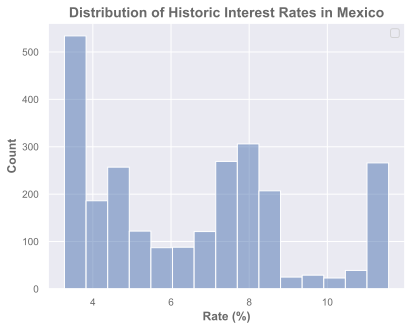

In [214]:
# Exploring distribution with histogram
sns.histplot(interest_rates_df.iloc[11:,1].astype(float).to_frame())
plt.title('Distribution of Historic Interest Rates in Mexico')
plt.xlabel('Rate (%)')
plt.ylabel('Count')
plt.legend('')
plt.show()

Likewise, no distribution is noticeable in the money market interest rates dataset.

#### **Correlations**

The distribution and variables's relationships of the sales dataset is shown below by a means of a pairplot:

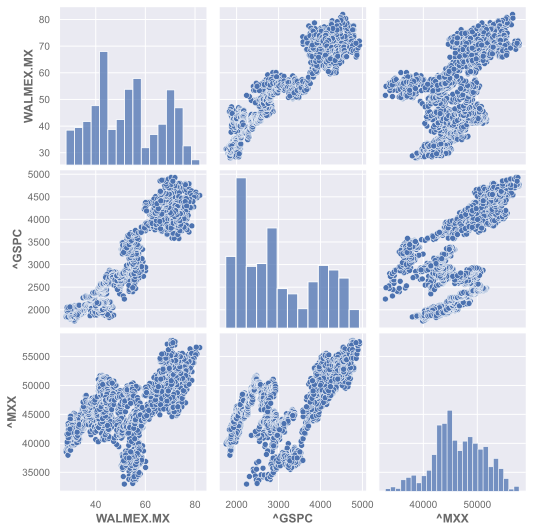

In [215]:
# Exploring distributions and correlations with pairplot
sns.pairplot(stocks_df)
plt.show()

The stock value of WALMEX and the S&P500 exhibited a strong positive correlation; whereas the weak positive correlation was observed between the stock value of WALMEX and the Mexican IPC.

A very weak positive correlation was seen between the S&P500 and the IPC.

The distribution and variables's relationships of the sales dataset is shown below by a means of a pairplot:

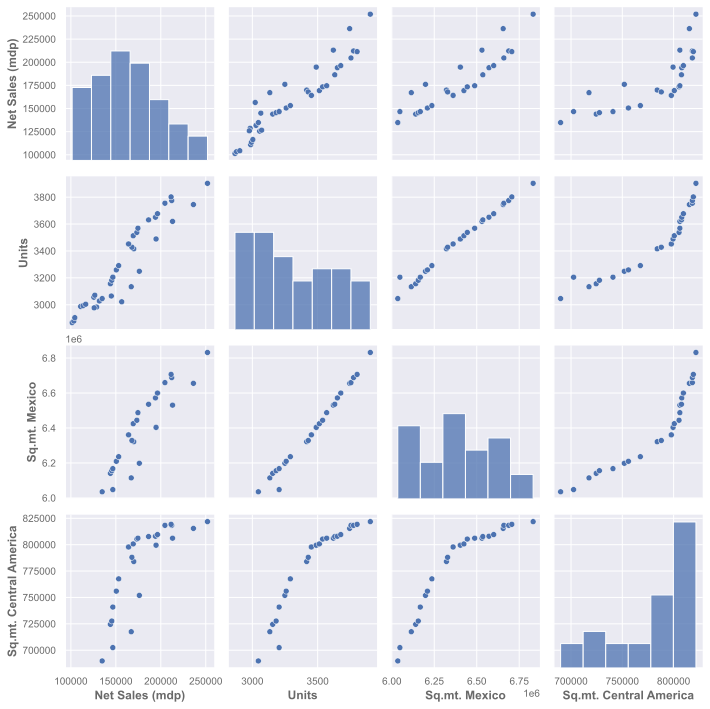

In [216]:
# Exploring distributions and correlations with pairplot
sns.pairplot(sales_df.drop(columns=['Year', 'Quarter']))

A strong positive correlation was observed for all the variables net sales, units, and commercial area in Mexico and Central America. 

Then, as both are quaterly-reported data, the net sales and the GDP were plot in a scatter plot to explore its relationship.

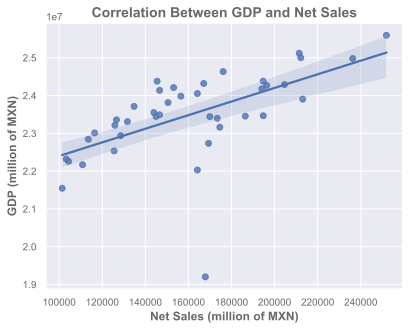

In [217]:
sns.regplot(x=sales_df["Net Sales (mdp)"], y=gdp_df[['OBS_VALUE']].astype(float).iloc[-40:,:])
plt.title('Correlation Between GDP and Net Sales')
plt.xlabel('Net Sales (million of MXN)')
plt.ylabel('GDP (million of MXN)')
plt.show()

A positive correlation was found between net sales and GDP.

Finally. a new dataframe with the exchange, bonds, and interest rates data was built to later explore its relationships.

In [218]:
rates_df = exchange_rates_df.copy()
rates_df = rates_df.iloc[11:].reset_index(drop=True).rename(columns={'Unnamed: 1':'exchange_rate'})
rates_df = pd.merge(rates_df, 
                    bonds_rates_df.iloc[11:].rename(columns={'Unnamed: 1':'bonds_rate'}), 
                    how='left', 
                    on='Banco de México')
rates_df = pd.merge(rates_df, 
                    interest_rates_df.iloc[11:].rename(columns={'Unnamed: 1':'interest_rate'}), 
                    how='left', 
                    on='Banco de México')
rates_df = rates_df.rename(columns={'Banco de México':'date'})
rates_df.head(10)

date exchange_rate bonds_rate interest_rate
0  01/01/2014       13.0652        NaN           NaN
1  01/02/2014       13.0652       3.16         3.795
2  01/03/2014       13.0843        NaN         3.795
3  01/04/2014       13.1011        NaN           NaN
4  01/05/2014       13.1011        NaN           NaN
5  01/06/2014       13.1011        NaN        3.7925
6  01/07/2014       13.0911        NaN        3.7962
7  01/08/2014       13.0905        NaN        3.7994
8  01/09/2014       13.0337       3.17        3.8005
9  01/10/2014       13.0846        NaN        3.7927

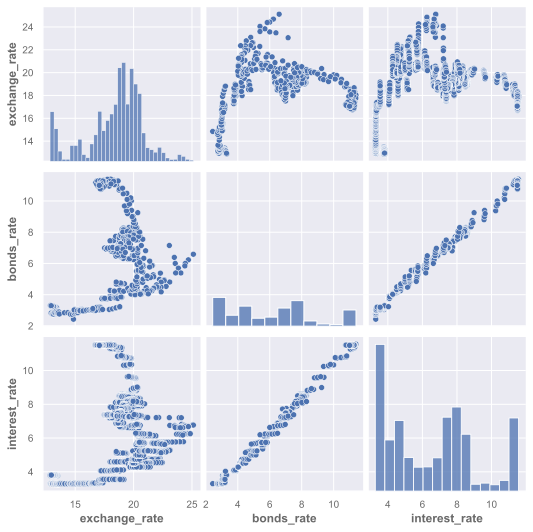

In [219]:
sns.pairplot(rates_df.drop(columns=['date']).astype(float))

As expectable, a strong positive correlation was found for the bonds rates and the money market interest rates.

On the other hand, no relationshiop was observed between the exchange rates and the bonds or interest rates.

<a class="anchor" id="preparation"></a>
___
## **4. Data Preparation**
___

After the data was explored, it was wrangled to build the appropriate dataset for modeling based on the purposes of the present study, and the quality of the data. 

In this context, the following transformations were performed:

* Select appropriate data and drop unnecessary attributes.
* Rename attributes.
* Alter data types.
* Handle missing values.
* Construct derived attributes.
* Group values.
* Join the diferent datasets.

### **4.1 Data Selection** <a class="anchor" id="selection"></a>

The **stock dataset** contains information regarding the stock value of the WALMEX, S&P500 and the IPC.

From the initial data analysis, it was found a strong positive relationship between the stock value of WALMEX and the S&P500; whereas the relationship between the stock value of WALMEX and the IPC was weaker. 

However, as WALMEX operates mostly within the Mexican market, it was decided to select not only the S&P500 as a predictor but the IPC, too.

On the other hand, the **sales dataset** contains quarter net sales data and number of units; as well as commercial area in $m^{2}$ in both Mexico and Central America. 

Net sales corresponds to the response variable in the model, so it was selected.

While the information for net sales and number of units is complete for the selected time period from 1 Feb 2014 to 1 Feb 2024, it was found that the attibutes for commercial area in $m^{2}$ in both Mexico and Central America suffer from a $32.5%$ of missing values. So it was decided to select only number of units from the sales dataset as a predictor in the model.

In [220]:
sales_df = sales_df.drop(columns=['Sq.mt. Mexico', 'Sq.mt. Central America'])

From the **GDP dataset**, the attributes 'TIME_PERIOD', 'OBS_VALUE', 'OBS_EXCEPTION', 'OBS_STATUS', 'OBS_SOURCE',
'OBS_NOTE', and 'COBER_GEO' were present in the dataset; where 'OBS_VALUE' was the quarterly estimation of the GDP in Mexico. In this sense, from the initial data analysis a positive correlation was found between the net sales of WALMEX and GDP. So, OBS VALUE was selected as a predictor in the model, along with the temporality attribute 'TIME_PERIOD'.

In [221]:
gdp_df = gdp_df[['TIME_PERIOD', 'OBS_VALUE']]

Then, from the **exchange rates dataset**, no meaningful correlation could be established between the historical exchange rates and the net sales of WALMEX. However, for sake of completeness, the exchange rates were selected as a predictor in the model.

Lastly, regarding the **bonds rates** and the **interest rates datasets**, it was found that the bonds rates and the money market interest rate were heavily correlated. So, to avoid multicollinearity issues within the model, only one variable from those two was selected.

Taking into account that the money market interest rates are more relevant to the proper functioning of businesses in the country in terms to access to capital from the financial system, and that the bonds rate dataset exhibited a higher percentage of missing values, it was decided to select only interest rates as a predictor in the model.

### **4.2 Attributes Renaming** <a class="anchor" id="renaming"></a>

For the **stock dataset**, the attributes were renamed as follows:

In [222]:
stocks_df = stocks_df.rename(columns={"WALMEX.MX": "walmex", "^MXX": "ipc", "^GSPC": "sp500"})

For the **sales dataset**, the attributes were renamed as follows:

In [223]:
sales_df = sales_df.rename(columns={'Year':'year', 
                                    'Quarter':'quarter', 
                                    'Net Sales (mdp)': 'net_sales', 
                                    'Units': 'units'})

For the **GDP dataset**, the attributes were renamed as follows:

In [224]:
gdp_df = gdp_df.rename(columns={'TIME_PERIOD': 'year_quarter', 'OBS_VALUE': 'gdp'})

For the **exchange rates dataset**, the attributes were renamed as follows:

In [225]:
exchange_rates_df = exchange_rates_df.rename(columns={'Banco de México': 'date', 'Unnamed: 1': 'exchange_rates'})

For the **interest rates dataset**, the attributes were renamed as follows:

In [226]:
interest_rates_df = interest_rates_df.rename(columns={'Banco de México': 'date', 'Unnamed: 1': 'interest_rates'})

### **4.3 Data Types Adjustment** <a class="anchor" id="datatypes"></a>

In this section, the data types of the different datasets were adjusted.

In [227]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584 entries, 2014-02-03 to 2024-01-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   walmex  2515 non-null   float64
 1   sp500   2516 non-null   float64
 2   ipc     2514 non-null   float64
dtypes: float64(3)
memory usage: 80.8 KB


The attributes in the **stock dataset** have the proper data types. So no altering was required.

In [228]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       40 non-null     int64 
 1   quarter    40 non-null     object
 2   net_sales  40 non-null     int64 
 3   units      40 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


The attribute *year* in the **sales dataset** was transformed to a string data type, as it will further concatenated with the quarter attribute. Moreover, no math aggregations are applicable for *year* within the present study.

In [229]:
sales_df.year = sales_df.year.astype(str)

In [230]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year_quarter  176 non-null    object
 1   gdp           176 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


The attribute *gdp* in the **GDP dataset** was transformed to a float data type.

In [231]:
gdp_df.gdp = gdp_df.gdp.astype('float64')

In [232]:
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            3723 non-null   object
 1   exchange_rates  3720 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


The attributes *date* and *exchange_rates* from the **exchange rates dataset** were transformed to date and float data types, respectively. To do so, first, all the non-numeric values values in the attributes were replaced by NaN values to avoid casting errors.

In [233]:
exchange_rates_df.date = pd.to_datetime(exchange_rates_df.date, errors='coerce').dt.date
exchange_rates_df.exchange_rates = exchange_rates_df.exchange_rates.replace({'[^0-9.]': np.nan}, regex=True).astype('float64')

In [234]:
interest_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            2565 non-null   object
 1   interest_rates  2562 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


Likewise, the attributes *date* and *interest_rates* from the **interest rates dataset** were transformed to date and float data types, respectively. To do so, the non-numeric values values in the attributes were replaced by NaN values.

In [235]:
interest_rates_df.date = pd.to_datetime(interest_rates_df.date, errors='coerce').dt.date
interest_rates_df.interest_rates = interest_rates_df.interest_rates.replace({'[^0-9.]': np.nan}, regex=True).astype('float64')

### **4.4 Missing Values Handling** <a class="anchor" id="missing_values"></a>

In the different datasets, the missing values were drop, as the data will be aggregated in a later step on a quarterly basis.

In [236]:
stocks_df = stocks_df.dropna()
sales_df = sales_df.dropna()
gdp_df = gdp_df.dropna()
exchange_rates_df = exchange_rates_df.dropna()
interest_rates_df = interest_rates_df.dropna()

### **4.5 Derived Attributes Construction** <a class="anchor" id="derived_attributes"></a>

The datasets have different reporting periods:
- **Stocks dataset**: Daily.
- **Sales dataset**: Quarterly.
- **GDP dataset**: Quarterly.
- **Exchange rates dataset**: Daily.
- **Interest rates dataset**: Daily.

In this context, it was decided to add a new derived attribute *year_quarter* for the **stocks, exchange rates, and interest rates datasets**. This, in order to be able to match them with the quarterly reported datasets.

In [237]:
# Adding a year_quarter attribute to the stocks dataset
stocks_df['year'] = stocks_df.index.year
stocks_df['year_quarter'] = pd.PeriodIndex(stocks_df.index, freq='Q')

In [238]:
stocks_df.head()

Ticker         walmex        sp500           ipc  year year_quarter
Date                                                               
2014-02-04  31.500000  1755.199951  40085.519531  2014       2014Q1
2014-02-05  31.379999  1751.640015  39880.871094  2014       2014Q1
2014-02-06  31.190001  1773.430054  40288.781250  2014       2014Q1
2014-02-07  29.850000  1797.020020  40525.738281  2014       2014Q1
2014-02-10  29.740000  1799.839966  40116.359375  2014       2014Q1

In [239]:
# Adding a year_quarter attribute to the exchange rates dataset
exchange_rates_df.date = pd.to_datetime(exchange_rates_df.date)
exchange_rates_df = exchange_rates_df.set_index('date')
exchange_rates_df['year'] = exchange_rates_df.index.year
exchange_rates_df['year_quarter'] = pd.PeriodIndex(exchange_rates_df.index, freq='Q')

In [240]:
# Adding a year_quarter attribute to the interest rates dataset
interest_rates_df.date = pd.to_datetime(interest_rates_df.date)
interest_rates_df = interest_rates_df.set_index('date')
interest_rates_df['year'] = interest_rates_df.index.year
interest_rates_df['year_quarter'] = pd.PeriodIndex(interest_rates_df.index, freq='Q')

Moreover, the nomenclature of the *year_quarter* attribute in the **GDP dataset** was harmonized with the one created by the method *PeriodIndex* from pandas.

In [241]:
gdp_df.head()

year_quarter           gdp
0      1980/01  1.040137e+07
1      1980/02  1.034235e+07
2      1980/03  1.039273e+07
3      1980/04  1.092767e+07
4      1981/01  1.134585e+07

In [242]:
gdp_df.year_quarter = gdp_df.year_quarter.apply(lambda x: x.replace('/0', 'Q'))

In [243]:
gdp_df.head()

year_quarter           gdp
0       1980Q1  1.040137e+07
1       1980Q2  1.034235e+07
2       1980Q3  1.039273e+07
3       1980Q4  1.092767e+07
4       1981Q1  1.134585e+07

Finally, a new attribute *year_quarter* was introduced in the **sales dataset**:

In [244]:
sales_df['year_quarter'] = sales_df.year + sales_df.quarter

In [245]:
sales_df.head()

year quarter  net_sales  units year_quarter
0  2014      Q1     101405   2867       2014Q1
1  2014      Q2     103300   2879       2014Q2
2  2014      Q3     104367   2904       2014Q3
3  2014      Q4     128586   2983       2014Q4
4  2015      Q1     110875   2987       2015Q1

### **4.6 Data Aggregation** <a class="anchor" id="aggregation"></a>

The **sales and GDP datasets** are reported on a quarterly basis. So, it was decided to aggregate the **stocks, exchange rates and interest rates datasets** on a quarterly basis to harmonize the reporting time period among all datasets, and further join them in a next step.

In [246]:
# Aggregating stocks dataset on a quarterly basis
stocks_df = (stocks_df.groupby(by='year_quarter', as_index=False).mean()
             .drop(columns='year').reset_index(drop=True))
stocks_df.head()

Ticker year_quarter     walmex        sp500           ipc
0            2014Q1  29.680789  1843.603426  39528.067331
1            2014Q2  33.320492  1901.228686  41669.394467
2            2014Q3  34.399206  1975.541901  44788.734003
3            2014Q4  30.782623  2007.633117  43557.017354
4            2015Q1  33.806780  2064.119323  42891.938957

In [247]:
# Aggregating exchange rates dataset on a quarterly basis
exchange_rates_df = (exchange_rates_df.groupby(by='year_quarter', as_index=False).mean()
                    .drop(columns='year').reset_index(drop=True))
exchange_rates_df.head()

year_quarter  exchange_rates
0       2014Q1       13.233682
1       2014Q2       13.002503
2       2014Q3       13.110359
3       2014Q4       13.841998
4       2015Q1       14.930269

In [248]:
# Aggregating exchange rates dataset on a quarterly basis
interest_rates_df = (interest_rates_df.groupby(by='year_quarter', as_index=False).mean()
                     .drop(columns='year').reset_index(drop=True))
interest_rates_df.head()

year_quarter  interest_rates
0       2014Q1        3.789890
1       2014Q2        3.677145
2       2014Q3        3.295198
3       2014Q4        3.293132
4       2015Q1        3.300654

### **4.7 Data Integration** <a class="anchor" id="integration"></a>

Finally, all the datasets were joined into a single dataset using the *year_quarter* attribute.

In [249]:
# Adjusting Datatypes on primary keys

stocks_df.year_quarter = stocks_df.year_quarter.astype(str)
exchange_rates_df.year_quarter = exchange_rates_df.year_quarter.astype(str)
interest_rates_df.year_quarter = interest_rates_df.year_quarter.astype(str)

In [250]:
# Merging datasets

df = (sales_df.merge(gdp_df, how='inner', on='year_quarter')
      .merge(stocks_df, how='inner', on='year_quarter')
      .merge(exchange_rates_df, how='inner', on='year_quarter')
      .merge(interest_rates_df, how='inner', on='year_quarter')
      )
df.head()

year quarter  net_sales  units year_quarter           gdp     walmex  \
0  2014      Q1     101405   2867       2014Q1  2.154765e+07  29.680789   
1  2014      Q2     103300   2879       2014Q2  2.232009e+07  33.320492   
2  2014      Q3     104367   2904       2014Q3  2.225821e+07  34.399206   
3  2014      Q4     128586   2983       2014Q4  2.293982e+07  30.782623   
4  2015      Q1     110875   2987       2015Q1  2.217008e+07  33.806780   

         sp500           ipc  exchange_rates  interest_rates  
0  1843.603426  39528.067331       13.233682        3.789890  
1  1901.228686  41669.394467       13.002503        3.677145  
2  1975.541901  44788.734003       13.110359        3.295198  
3  2007.633117  43557.017354       13.841998        3.293132  
4  2064.119323  42891.938957       14.930269        3.300654

In [251]:
# Drop year and quarter columns
df = df.drop(columns=['year', 'quarter']).set_index('year_quarter')
df.head()

net_sales  units           gdp     walmex        sp500  \
year_quarter                                                           
2014Q1           101405   2867  2.154765e+07  29.680789  1843.603426   
2014Q2           103300   2879  2.232009e+07  33.320492  1901.228686   
2014Q3           104367   2904  2.225821e+07  34.399206  1975.541901   
2014Q4           128586   2983  2.293982e+07  30.782623  2007.633117   
2015Q1           110875   2987  2.217008e+07  33.806780  2064.119323   

                       ipc  exchange_rates  interest_rates  
year_quarter                                                
2014Q1        39528.067331       13.233682        3.789890  
2014Q2        41669.394467       13.002503        3.677145  
2014Q3        44788.734003       13.110359        3.295198  
2014Q4        43557.017354       13.841998        3.293132  
2015Q1        42891.938957       14.930269        3.300654

In [252]:
df.tail()

net_sales  units           gdp     walmex        sp500  \
year_quarter                                                           
2022Q4           236272   3745  2.498115e+07  73.022500  3849.569010   
2023Q1           204601   3755  2.429196e+07  72.581333  3999.022510   
2023Q2           212164   3775  2.500194e+07  70.336667  4208.393827   
2023Q3           211436   3802  2.512127e+07  67.776825  4458.137447   
2023Q4           251921   3903  2.559636e+07  66.062000  4463.005339   

                       ipc  exchange_rates  interest_rates  
year_quarter                                                
2022Q4        49374.139648       19.699096       10.029444  
2023Q1        53196.447331       18.704144       11.071640  
2023Q2        54292.645443       17.723184       11.521205  
2023Q3        53210.645523       17.058150       11.501251  
2023Q4        52375.833008       17.582583       11.504218

Now, the dataset is ready for the **Exploratory Data Analysis**.

<a class="anchor" id="eda"></a>
___
## **5. Exploratory Data Analysis**
___

In this section, the data was explored to calculate simple statistical measures, identify time trends, explore distributions and relationships from the unified dataset.

### **5.1 Statistical Measures** <a class="anchor" id="statistical_measures"></a>

In [253]:
df.describe()

net_sales        units           gdp     walmex        sp500  \
count      40.000000    40.000000  4.000000e+01  40.000000    40.000000   
mean   160831.950000  3311.700000  2.349702e+07  52.416249  3006.016493   
std     37308.578943   300.161512  1.136271e+06  13.595784   905.561387   
min    101405.000000  2867.000000  1.920180e+07  29.680789  1843.603426   
25%    130929.000000  3041.500000  2.299367e+07  42.609978  2147.388925   
50%    160334.500000  3254.000000  2.347919e+07  52.997484  2793.243389   
75%    188321.250000  3545.750000  2.422661e+07  64.671428  3894.647899   
max    251921.000000  3903.000000  2.559636e+07  74.324166  4600.347089   

                ipc  exchange_rates  interest_rates  
count     40.000000       40.000000       40.000000  
mean   46309.976007       18.490338        6.431333  
std     4472.673823        2.382935        2.550068  
min    36401.019723       13.002503        3.293132  
25%    43350.607976       17.688033        4.242145  
50%    46092.678673       19.051471        6.221824  
75%    49392.656242       20.017630        8.143081  
max    54292.645443       23.365513       11.521205

### **5.2 Time Trends** <a class="anchor" id="time_trends"></a>

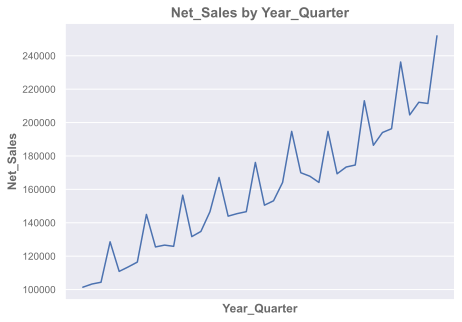

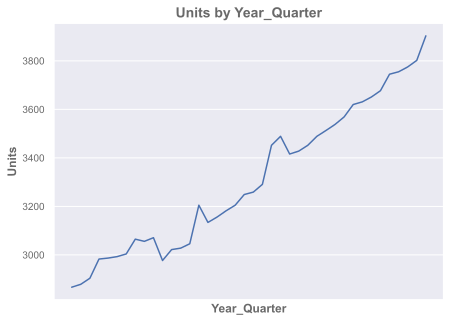

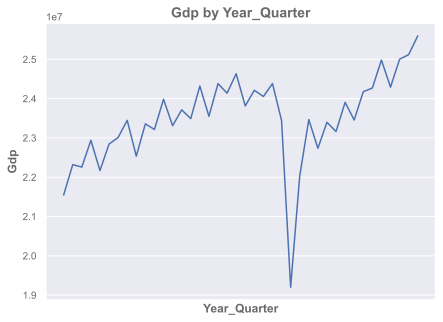

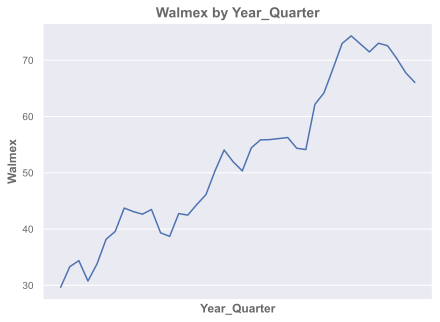

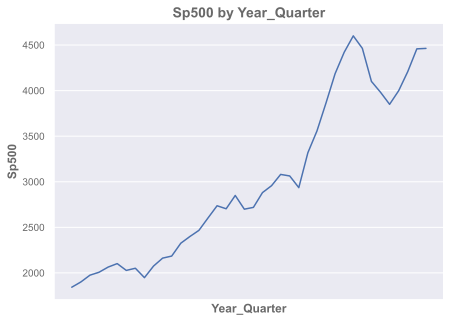

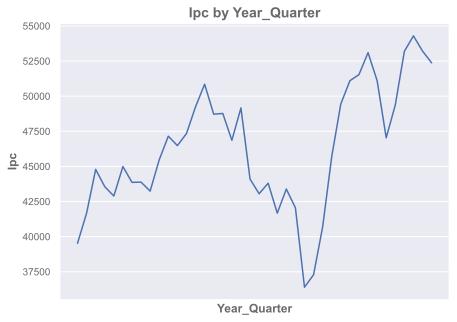

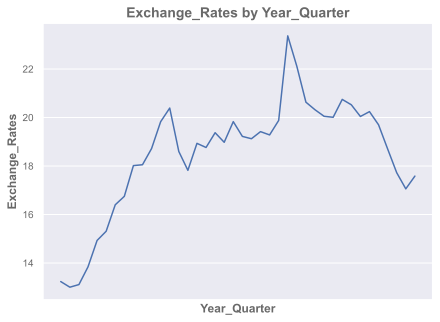

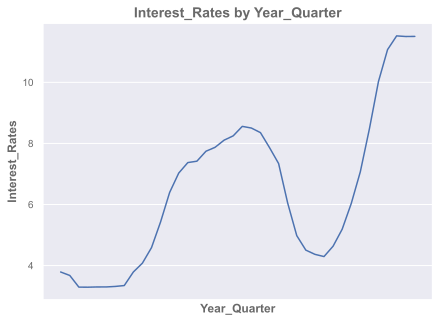

In [254]:
plot_linechart(df)

From the plots above, it can be seen that all the variables exhibited a positive trend over time.

### **5.3 Distributions and Relationships** <a class="anchor" id="dist_rel"></a>

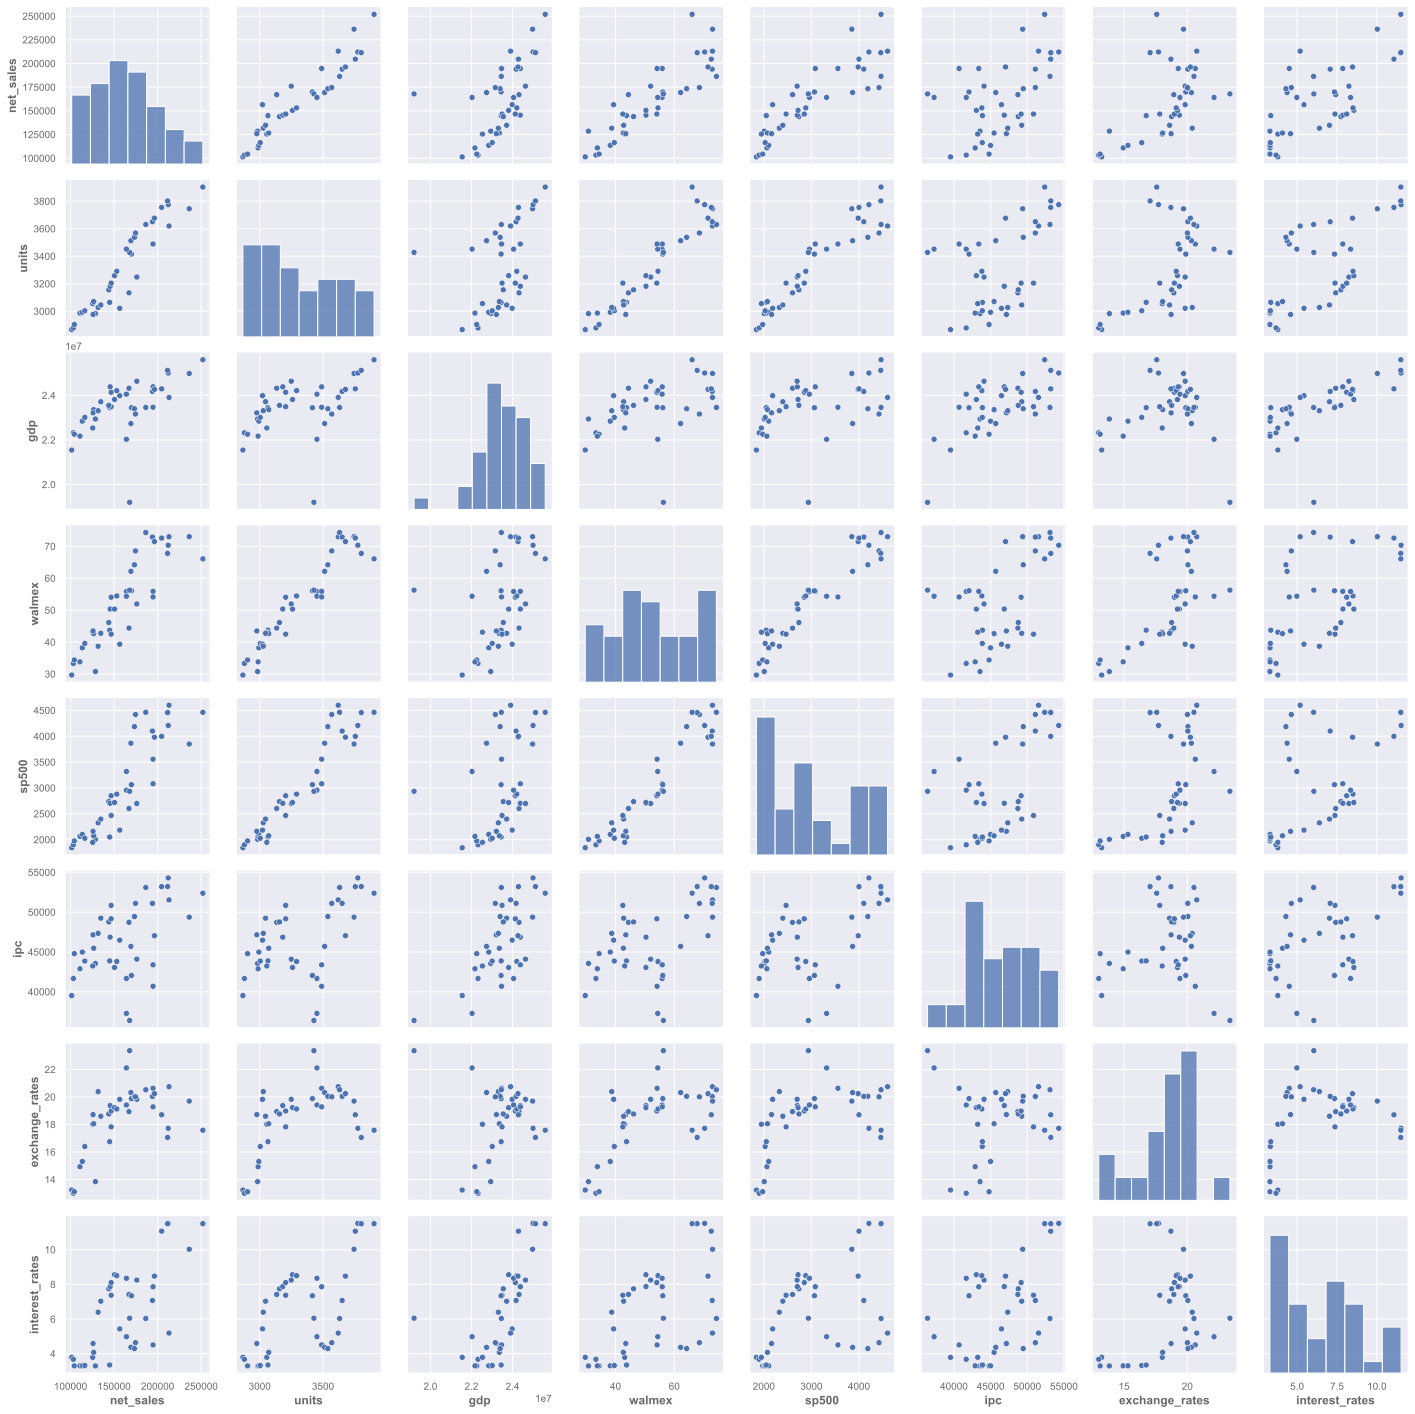

In [255]:
sns.pairplot(df)

From the plot above, none of the predictors followed a normal distribution.

Moreover, it can be seen that the variables **units**, **S&P500**, **WALMEX stock**, and **net sales** have a positive relationship; whereas the **GDP** and **interest rates** showed a moderate positive relationship.

### **5.4 Correlations** <a class="anchor" id="correlations"></a>

In [256]:
df.corr()

net_sales     units       gdp    walmex     sp500       ipc  \
net_sales        1.000000  0.941812  0.591655  0.881404  0.876755  0.497426   
units            0.941812  1.000000  0.471083  0.951423  0.950654  0.481692   
gdp              0.591655  0.471083  1.000000  0.458073  0.435537  0.668256   
walmex           0.881404  0.951423  0.458073  1.000000  0.949792  0.539263   
sp500            0.876755  0.950654  0.435537  0.949792  1.000000  0.575764   
ipc              0.497426  0.481692  0.668256  0.539263  0.575764  1.000000   
exchange_rates   0.545840  0.539032  0.103462  0.613590  0.524288  0.070975   
interest_rates   0.706790  0.665831  0.690051  0.597886  0.536097  0.505446   

                exchange_rates  interest_rates  
net_sales             0.545840        0.706790  
units                 0.539032        0.665831  
gdp                   0.103462        0.690051  
walmex                0.613590        0.597886  
sp500                 0.524288        0.536097  
ipc                   0.070975        0.505446  
exchange_rates        1.000000        0.317116  
interest_rates        0.317116        1.000000

Text(47.10937499999999, 0.5, 'Attributes')

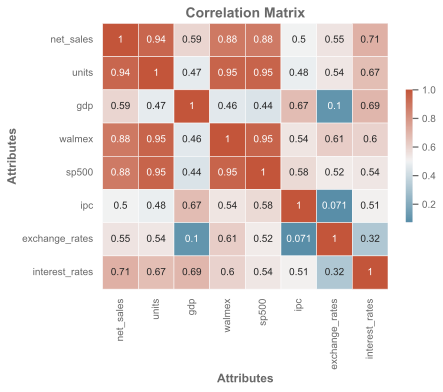

In [265]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, center=0.5, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Attributes')
plt.ylabel('Attributes')

Indeed, from the table above, it can be seen that the correlation among **net sales**, **units**, **WALMEX stock**, and **S&P500** is strong; whereas **GDP**, **interest rates** and **IPC** are moderately correlated.

On the other hand, **exchange rates**, **GDP** and **IPC** are weakly correlated.

### **5.5 Differencing** <a class="anchor" id="diff"></a>

As strong correlations among the attributes in the dataset were found, it was decided to calculate the differences among observations for each variable.

In [125]:
df.diff()

net_sales  units          gdp    walmex       sp500  \
year_quarter                                                        
2014Q1              NaN    NaN          NaN       NaN         NaN   
2014Q2           1895.0   12.0   772439.473  3.639703   57.625260   
2014Q3           1067.0   25.0   -61883.856  1.078714   74.313215   
2014Q4          24219.0   79.0   681607.627 -3.616583   32.091216   
2015Q1         -17711.0    4.0  -769739.789  3.024157   56.486206   
2015Q2           2675.0    6.0   673107.361  4.392073   38.175439   
2015Q3           2908.0   11.0   168436.267  1.374798  -74.588570   
2015Q4          28523.0   61.0   436115.112  4.159252   23.757037   
2016Q1         -19467.0   -9.0  -911954.852 -0.622731 -103.225304   
2016Q2           1094.0   15.0   823087.967 -0.458297  126.893481   
2016Q3           -733.0  -94.0  -144280.433  0.836220   87.288906   
2016Q4          30640.0   45.0   770137.090 -4.150428   22.484175   
2017Q1         -24805.0    6.0  -674041.839 -0.635500  140.787174   
2017Q2           3082.0   18.0   403515.674  4.053571   73.568811   
2017Q3          11843.0  159.0  -222953.221 -0.271452   67.914152   
2017Q4          20480.0  -71.0   829054.680  1.899047  135.831554   
2018Q1         -23162.0   22.0  -768826.439  1.743736  133.879166   
2018Q2           1523.0   26.0   830388.254  4.231661  -32.986940   
2018Q3           1159.0   23.0  -243029.643  3.691905  145.703024   
2018Q4          29488.0   44.0   495679.257 -2.106301 -150.142597   
2019Q1         -25589.0   10.0  -820271.023 -1.607554   19.582852   
2019Q2           2615.0   32.0   398092.413  4.108466  162.235186   
2019Q3          11005.0  161.0  -158157.609  1.407294   75.922653   
2019Q4          30570.0   37.0   328696.864  0.041976  123.538524   
2020Q1         -24767.0  -73.0  -938115.399  0.184734  -16.924056   
2020Q2          -2082.0   12.0 -4242953.706  0.196816 -128.147437   
2020Q3          -3721.0   24.0  2828564.567 -1.915431  383.125359   
2020Q4          30570.0   37.0  1436766.856 -0.226280  238.480987   
2021Q1         -25390.0   24.0  -731247.989  8.026662  308.241010   
2021Q2           4044.0   25.0   662532.377  2.046887  320.753682   
2021Q3           1199.0   31.0  -236375.579  4.341144  234.492389   
2021Q4          38486.0   51.0   744441.461  4.439178  179.587107   
2022Q1         -26654.0   11.0  -450075.199  1.335941 -136.780602   
2022Q2           7649.0   20.0   720026.474 -1.427117 -362.603037   
2022Q3           2263.0   26.0    92985.832 -1.422605 -118.913592   
2022Q4          39951.0   68.0   711724.075  1.548056 -132.480849   
2023Q1         -31671.0   10.0  -689190.328 -0.441167  149.453499   
2023Q2           7563.0   20.0   709983.829 -2.244667  209.371318   
2023Q3           -728.0   27.0   119329.291 -2.559842  249.743620   
2023Q4          40485.0  101.0   475091.294 -1.714826    4.867891   

                      ipc  exchange_rates  interest_rates  
year_quarter                                               
2014Q1                NaN             NaN             NaN  
2014Q2        2141.327136       -0.231179       -0.112745  
2014Q3        3119.339536        0.107855       -0.381947  
2014Q4       -1231.716649        0.731639       -0.002067  
2015Q1        -665.078397        1.088271        0.007522  
2015Q2        2099.669970        0.379645        0.000254  
2015Q3       -1127.769393        1.091249        0.016643  
2015Q4          16.158072        0.348193        0.029321  
2016Q1        -638.493498        1.266760        0.443094  
2016Q2        2230.406048        0.035913        0.290438  
2016Q3        1679.088108        0.666134        0.506849  
2016Q4        -668.554319        1.108795        0.842175  
2017Q1         856.216927        0.562376        0.966881  
2017Q2        1904.803587       -1.790742        0.633231  
2017Q3        1606.913207       -0.776203        0.343346  
2017Q4       -2131.552536        1.111891        0.045699  
2018Q1          50.576675       -0.

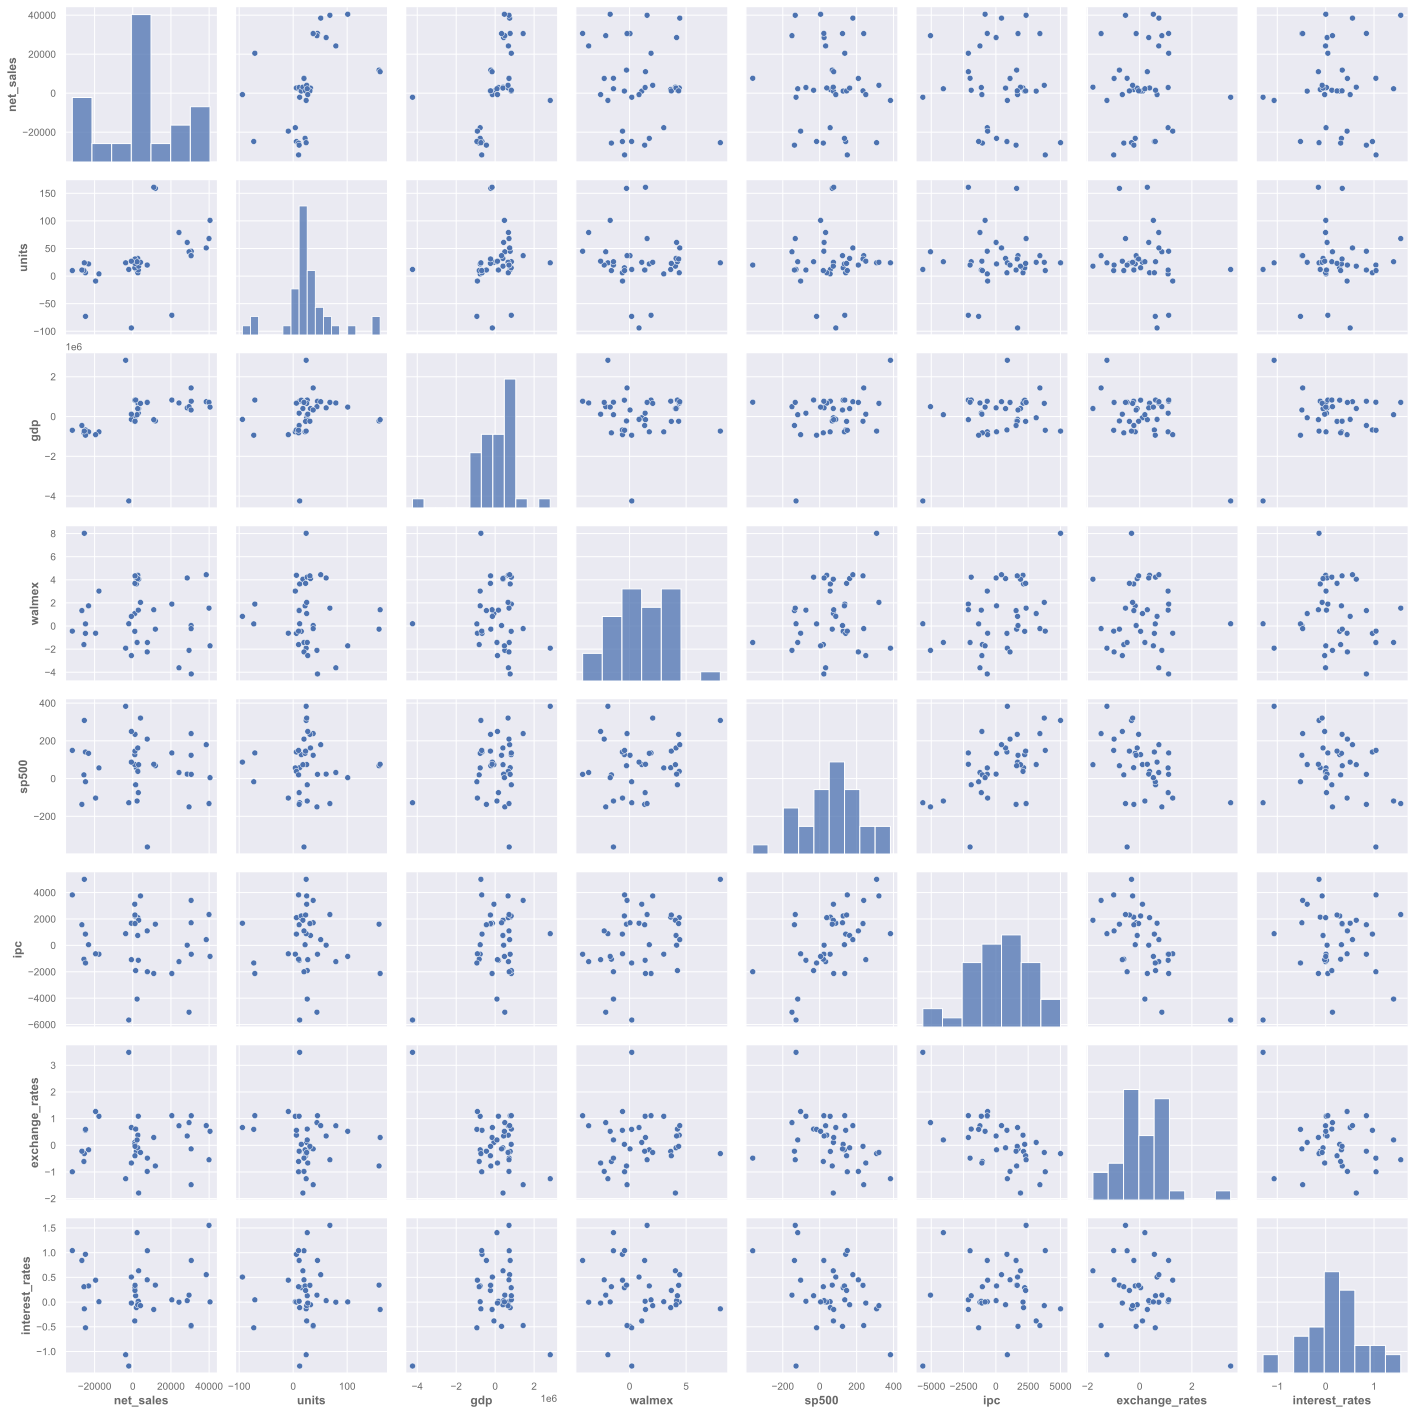

In [126]:
sns.pairplot(df.diff())

The differences did not exhibit any clear relationship among them, and they tended to follow a closer normal distribution. To confirm these results, the Pearson's correlation coefficient was calculated for the differences.

In [127]:
df.diff().corr()

net_sales     units       gdp    walmex     sp500       ipc  \
net_sales        1.000000  0.438193  0.471910 -0.143753 -0.086474 -0.143666   
units            0.438193  1.000000  0.138183 -0.094973 -0.006673 -0.018928   
gdp              0.471910  0.138183  1.000000 -0.087999  0.281858  0.279658   
walmex          -0.143753 -0.094973 -0.087999  1.000000  0.224537  0.394898   
sp500           -0.086474 -0.006673  0.281858  0.224537  1.000000  0.572800   
ipc             -0.143666 -0.018928  0.279658  0.394898  0.572800  1.000000   
exchange_rates   0.057721 -0.177507 -0.543744 -0.035092 -0.399108 -0.615247   
interest_rates  -0.013358  0.028760  0.105603 -0.092308 -0.347191  0.090324   

                exchange_rates  interest_rates  
net_sales             0.057721       -0.013358  
units                -0.177507        0.028760  
gdp                  -0.543744        0.105603  
walmex               -0.035092       -0.092308  
sp500                -0.399108       -0.347191  
ipc                  -0.615247        0.090324  
exchange_rates        1.000000       -0.236574  
interest_rates       -0.236574        1.000000

Text(47.10937499999999, 0.5, 'Attributes')

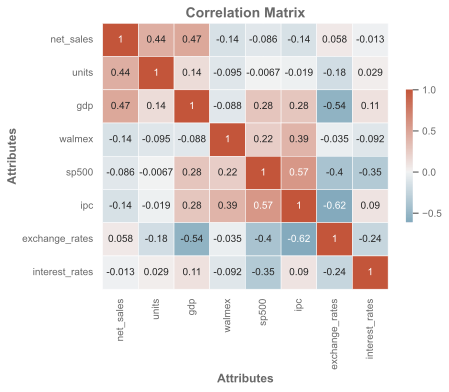

In [267]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.diff().corr(), cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Attributes')
plt.ylabel('Attributes')

Indeed, according to the table above, only weak or moderate correlations were found among the differences.

In this context, it was decided to include the differences within the dataset to explore where they could serve as better predictors.

Please note that the **net_sales_diff** was drop from the dataset as **net sales** will be the response variable in the model.

In [128]:
# Concatenating the differences attributes to the dataset
df = pd.concat([df, df.diff().add_suffix('_diff')], axis=1).drop(columns=['net_sales_diff']).dropna()

In [129]:
df.head()

net_sales  units           gdp     walmex        sp500  \
year_quarter                                                           
2014Q2           103300   2879  2.232009e+07  33.320492  1901.228686   
2014Q3           104367   2904  2.225821e+07  34.399206  1975.541901   
2014Q4           128586   2983  2.293982e+07  30.782623  2007.633117   
2015Q1           110875   2987  2.217008e+07  33.806780  2064.119323   
2015Q2           113550   2993  2.284318e+07  38.198853  2102.294762   

                       ipc  exchange_rates  interest_rates  units_diff  \
year_quarter                                                             
2014Q2        41669.394467       13.002503        3.677145        12.0   
2014Q3        44788.734003       13.110359        3.295198        25.0   
2014Q4        43557.017354       13.841998        3.293132        79.0   
2015Q1        42891.938957       14.930269        3.300654         4.0   
2015Q2        44991.608927       15.309914        3.300908         6.0   

                gdp_diff  walmex_diff  sp500_diff     ipc_diff  \
year_quarter                                                     
2014Q2        772439.473     3.639703   57.625260  2141.327136   
2014Q3        -61883.856     1.078714   74.313215  3119.339536   
2014Q4        681607.627    -3.616583   32.091216 -1231.716649   
2015Q1       -769739.789     3.024157   56.486206  -665.078397   
2015Q2        673107.361     4.392073   38.175439  2099.669970   

              exchange_rates_diff  interest_rates_diff  
year_quarter                                            
2014Q2                  -0.231179            -0.112745  
2014Q3                   0.107855            -0.381947  
2014Q4                   0.731639            -0.002067  
2015Q1                   1.088271             0.007522  
2015Q2                   0.379645             0.000254

<a class="anchor" id="modeling"></a>
___
## **6. Modeling**
___

To answer the research question, two models were built: a recurrent neural network for the **multivariate times series forecasting** of the economic indicators, and a **regression model** using artificial neural networks to predict the sales of WALMEX over the next ten years based on the economic forecasts from the first model. 

So, together, the two models were able to predict the net sales of WALMEX over the next ten years, based on a set of economic indicators, rather than just using the historical sales as the only data input for the model.

For sake of clarity, each model was described separately in the present section.

### **6.1 Predictors and Response Split** <a class="anchor" id="split"></a>

The dataset was split into predictors ($X$) and the response variable ($Y$).

In [130]:
X = df[df.columns.difference(['net_sales'], sort=False)]
Y = df['net_sales']

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2014Q2 to 2023Q4
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   units                39 non-null     int64  
 1   gdp                  39 non-null     float64
 2   walmex               39 non-null     float64
 3   sp500                39 non-null     float64
 4   ipc                  39 non-null     float64
 5   exchange_rates       39 non-null     float64
 6   interest_rates       39 non-null     float64
 7   units_diff           39 non-null     float64
 8   gdp_diff             39 non-null     float64
 9   walmex_diff          39 non-null     float64
 10  sp500_diff           39 non-null     float64
 11  ipc_diff             39 non-null     float64
 12  exchange_rates_diff  39 non-null     float64
 13  interest_rates_diff  39 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.6+ KB


Finally, only the Numpy arrays for the matrices $X$ and $Y$ were kept for the subsequent steps.

In [132]:
X = X.values
Y = Y.values

### **6.2 Multivariate Time Series Model** <a class="anchor" id="time_series"></a>

#### **Modeling Technique** <a class="anchor" id="technique"></a>

As shown above, the dataset comprises historical data about $14$ features (economic indicators and derived attributes) and $1$ response variable (net sales of WALMEX in millions of MXN). 

A first model for **multivariate times series prediction** was built using **recurrent neural networks** (RNN) for forecasting the $14$ features over the next ten years. **RNN** were selected as they are able to handle a sequence of inputs and generate a sequence of outputs at the same time, when using a sequence-to-sequence network approach [(Gerón, 2019)](#geron).

#### **Modeling Assumptions** <a class="anchor" id="assumptions"></a>

The main assumption is that RNNs were able to identify patterns in the historical data from the selected economic indicators, and those patterns could be used to make predictions.

#### **Training, Validation and Testing sets** <a class="anchor" id="sets"></a>

### **6.3 Regression Model** <a class="anchor" id="time_series"></a>

#### **Modeling Technique** <a class="anchor" id="technique"></a>

As it was desired to predict a target numeric value, a **regression model** was built for predicting the net sales of WALMEX based on the $14$ features forecasts. Again, it was decided to use a deep learning approach, as artificial neural networks with more than one layer supports non-linear separable problems.

#### **Modeling Assumptions** <a class="anchor" id="assumptions"></a>

The main assumption is that the net sales of WALMEX can be predicted as a function of the economic indicators of Mexico and USA.

Furthermore, it was assumed that the problem was not linearly separable, thus, at least one hidden layer was necessary. 

#### **Data Normalization** <a class="anchor" id="normalization"></a>

To avoid the attributes in the dataset with larger values to dominate the rest of the predictors, the attributes in the dataset were scaled using the *MaxAbsScaler* from Sklearn.

<a class="anchor" id="references"></a>
___
## **8. References**
___


* <a class="anchor" id="geron"></a>**Géron, A. (2019)**. *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow*. O’Reilly Media, Inc.
* <a class="anchor" id="nist"></a>**NIST/SEMATECH (2012)**. *e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm 
* <a class="anchor" id="rollins"></a> **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* https://www.ibm.com/downloads/cas/WKK9DX51
* <a class="anchor" id="walmex"></a>**Wal-Mart de México S.A.B. de C.V. (2024)**. *Información Financiera Trimestral 4T*. https://files.walmex.mx/upload/files/2023/ES/Trimestral/4T23/WALMEX_4T23_BMV.pdf